#### **La siguiente actividad se basa en los datos del archivo "WA_Fn-UseC_-HR-Employee-Attrition.csv" que se encuentra en la siguiente liga de Kaggle, llamada "IBM HR Analytics Employee Attrition & Performance":**

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [ ]:
# Incluye aquí todas las librerías que consideres necesarias:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
import imblearn.pipeline as imb_pipeline
import warnings
warnings.filterwarnings('ignore')

# **Ejercicio 1:**

#### **Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).**

El problema de deserción de empleados (employee attrition problem) se refiere a al impacto que tiene en la empresa la renuncia voluntaria de los empleados debido a distintos factores. La rotación de empleados en las empresas aumenta los costos de contratación y capacitación e impacta de manera negativa en la productividad en general. Entre los factores que influyen en la deserción se pueden encontrar la insatisfacción laboral, faltas de crecimiento o conflictos interpersonales.

En particular, para este dataset generado por IBM algunos de los factores que se pretenden estudiar en relación a la deserción son: el nivel de educación, el ambiente laboral, el balance de vida, la satisfacción laboral, el tiempo laborando entre varios otros.

# **Ejercicio 2:**

#### **Carga los datos del archivo de la página de Kaggle indicada como un DataFrame de Pandas, llamado "df" y utilicemos el método “describe” con el argumento include= “all”, para obtener una primera descripción general de cada variable.**

In [ ]:
# ++++++++++++++ Inicia sección de agregar código ++++++++++++++++++++
drive.mount('/content/drive')
DIR = "/content/drive/MyDrive/IA"
os.chdir(DIR)
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv", sep=',')
# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++

print("Tamaño del DataFrame:", df.shape)
df.describe(include = 'all').T


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Tamaño del DataFrame: (1470, 35)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# **Ejercicio 3:**

#### **Indica cuál es la diferencia entre utilizar o no el argumento include=”all” del método "describe" en el ejercicio anterior.**

De acuerdo con la documentación de pandas al utilizar el argumento `include='all'` todas las columnas, idenpendientemente del tipo de dato, serán parte del resultado o análisis (*output*) del método, es decir, las columnas numericas tendrás conteo y medidas de tendencia central, mientras que las categóricas medidas de conteo y frecuencia. Por otra parte, si no se utiliza `'all'` el argumento por defecto (*default*) es `include=None`, con lo cual solo las columnas numéricas serían incluidas en el *output*.

# **Ejercicio 4:**

#### **Con base a la información desplegada por la instrucción anterior, hemos decidido cancelar los siguientes factores de nuestro problema: Over18, EmployeeCount, StandardHours, EmployeeNumber. Explica cuál es la justificación que nos permite cancelar cada uno de estos factores:**

**a)   Over18**: Tiene como valor único 'Y' por lo que no aporta valor al análisis.

**b)	EmployeeCount**: Tiene como valor único '1' por lo que no aporta valor al análisis.

**c)	StandardHours**: Tiene como valor único '80' por lo que no aporta valor al análisis.

**d)	EmployeeNumber**: No aporta valor al análisis ya que solo representa el identificador numérico del empleado.





In [ ]:
# Eliminamos los factores indicados:

df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

print("Tamaño del nuevo DataFrame:", df.shape)

Tamaño del nuevo DataFrame: (1470, 31)


# **Ejercicio 5:**

In [ ]:
#I. Variables númericas
variables_enteras = df.select_dtypes(include=['int64']).columns.tolist()
print('Cantidad de variables enteras:', len(variables_enteras))
print('Variables enteras:', variables_enteras)
print('\n')
#II. Variables flotantes
variables_flotantes = df.select_dtypes(include=['float64']).columns.tolist()
print('Cantidad de variables flotantes:', len(variables_flotantes))
print('\n')
#III. Variables binarias
variables_binarias = [col for col in df.columns if df[col].nunique() == 2]
cant_binarias = len(variables_binarias)
print('Cantidad de variables binarias:', cant_binarias)
print('Variables binarias:', variables_binarias)
print('\n')
#IV. Variables categóricas nominales
variables_nominales = {}
for col in df.select_dtypes(include='object').columns:
    variables_nominales[col] = df[col].nunique()
cantidad_nominales = len(variables_nominales)
print('Cantidad de variables nominales:', cantidad_nominales)
print('Variables nominales:', variables_nominales)

print('\n')
#V. Variables categóricas ordinales y contar niveles
variables_ordinales = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
niveles_ordinales = {}
for col in variables_ordinales:
    niveles_ordinales[col] = df[col].nunique()
cantidad_ordinales = len(variables_ordinales)
print('Cantidad de variables ordinales:', cantidad_ordinales)
print('Variables ordinales:', variables_ordinales)

Cantidad de variables enteras: 23
Variables enteras: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Cantidad de variables flotantes: 0


Cantidad de variables binarias: 4
Variables binarias: ['Attrition', 'Gender', 'OverTime', 'PerformanceRating']


Cantidad de variables nominales: 8
Variables nominales: {'Attrition': 2, 'BusinessTravel': 3, 'Department': 3, 'EducationField': 6, 'Gender': 2, 'JobRole': 9, 'MaritalStatus': 3, 'OverTime': 2}


Cantidad de variables ordinales: 8
Variables ordinales: ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'Relation

#### **Realiza los análisis necesarios para encontrar cuántas y cuáles de las variables del nuevo DataFrame son:**

I.	Variables numéricas de valor entero:


*   Age
*   DailyRate
*   DistanceFromHome
*   MonthlyIncome
*   HourlyRate
*   MonthlyRate
*   NumCompaniesWorked
*   PercentSalaryHike
*   TotalWorkingYears
*   TrainingTimesLastYear
*   YearsAtCompany
*   YearsInCurrentRole
*   YearsSinceLastPromotion
*   YearsWithCurrManager


II.	Variables numéricas de valor real (flotante):

None

III.	Variables binarias:

*   Attrition
*   Gender
*   OverTime
*   PerformanceRating



IV.	Variables categóricas nominales. Indica el total de niveles que tiene cada una de estas variables:
*   Atrittion(2 categorías)
*   BussinessTravel(3 categorías)
*   Department (3 categorías)
*   EducationField (6 categorías)
*   JobRole (9 categorías)
*   MaritalStatus (3 categorías)

V.	Variables categóricas ordinales. Indica el total de niveles que tiene cada una de estas variables:

*   Education (5 Niveles)
*   EnvironmentSatisfaction (4 Niveles)
*   JobInvolvement (4 Niveles)
*   JobLevel (5 Niveles)
*   JobSatisfaction (4 Niveles)
*   RelationshipSatisfaction (4 Niveles)
*   StockOptionLevel (4 Niveles)
*   WorkLifeBalance (4 Niveles)

# **Ejercicio 6:**

#### **Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”. Despliega además la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.**

In [ ]:
# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++++
X = df.drop('Attrition', axis='columns')

y = df['Attrition']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.15,
                                                    stratify=y)

Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain,
                                                  test_size=0.1765, stratify=ytrain)

print(f"Dimensión de conjunto de  entrenamiento: Xtrain: {Xtrain.shape}, ytrain: {ytrain.shape}")
print("---------------------------------------")
print(f"Dimensión de conjunto de  prueba: Xtest: {Xtest.shape}, ytest: {ytest.shape}")
print("---------------------------------------")
print(f"Dimensión de conjunto de  validación: Xval: {Xval.shape}, yval: {yval.shape}")
# ++++++++++++++ Termina sección de agregar código +++++++++++++++++++++

Dimensión de conjunto de  entrenamiento: Xtrain: (1028, 30), ytrain: (1028,)
---------------------------------------
Dimensión de conjunto de  prueba: Xtest: (221, 30), ytest: (221,)
---------------------------------------
Dimensión de conjunto de  validación: Xval: (221, 30), yval: (221,)


# **Ejercicio 7:**


#### **Aplica la transformación LabelEncoder() de sklearn a la variable de salida “Attrition”. Las variables deberán seguir llamándose igual: ytrain, yval, ytest. Encuentra la proporción de datos en cada nivel de esta variable y con base a dicha información indica si podemos considerar que tenemos un problema de datos desbalanceados.**

#### NOTA: Aplica esta transformación evitando el filtrado de información (data leakage).

In [ ]:
le = LabelEncoder()
le.fit(ytrain)

ytrain = le.transform(ytrain)
ytest = le.transform(ytest)
yval = le.transform(yval)

ytrain_prop_no = round(len(ytrain[ytrain == 0])/len(ytrain), 2)
ytrain_prop_yes = round(len(ytrain[ytrain == 1])/len(ytrain), 2)

ytest_prop_no = round(len(ytest[ytest == 0])/len(ytest), 2)
ytest_prop_yes = round(len(ytest[ytest == 1])/len(ytest), 2)

yval_prop_no = round(len(yval[yval == 0])/len(yval), 2)
yval_prop_yes = round(len(yval[yval == 1])/len(yval), 2)

print(f"proporciones de ytrain: Yes: {ytrain_prop_yes}, No: {ytrain_prop_no}")
print("---------------------------------------")
print(f"proporciones de ytest: Yes: {ytest_prop_yes}, No: {ytest_prop_no}")
print("---------------------------------------")
print(f"proporciones de ytval: Yes: {yval_prop_yes}, No: {yval_prop_no}")
print("---------------------------------------")
# +++++++++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

proporciones de ytrain: Yes: 0.16, No: 0.84
---------------------------------------
proporciones de ytest: Yes: 0.16, No: 0.84
---------------------------------------
proporciones de ytval: Yes: 0.16, No: 0.84
---------------------------------------


De acuerdo con la proporción de datos se puede identificar que las clases están desbalanceadas ya que la clase 'yes' tiene una proporción mucho menor (16%) en comparación con la clase 'no' (84%).

# **Ejercicio 8:**


#### **Usando solamente el conjunto de Entrenamiento, obtener los histogramas de las variables numéricas. Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?**

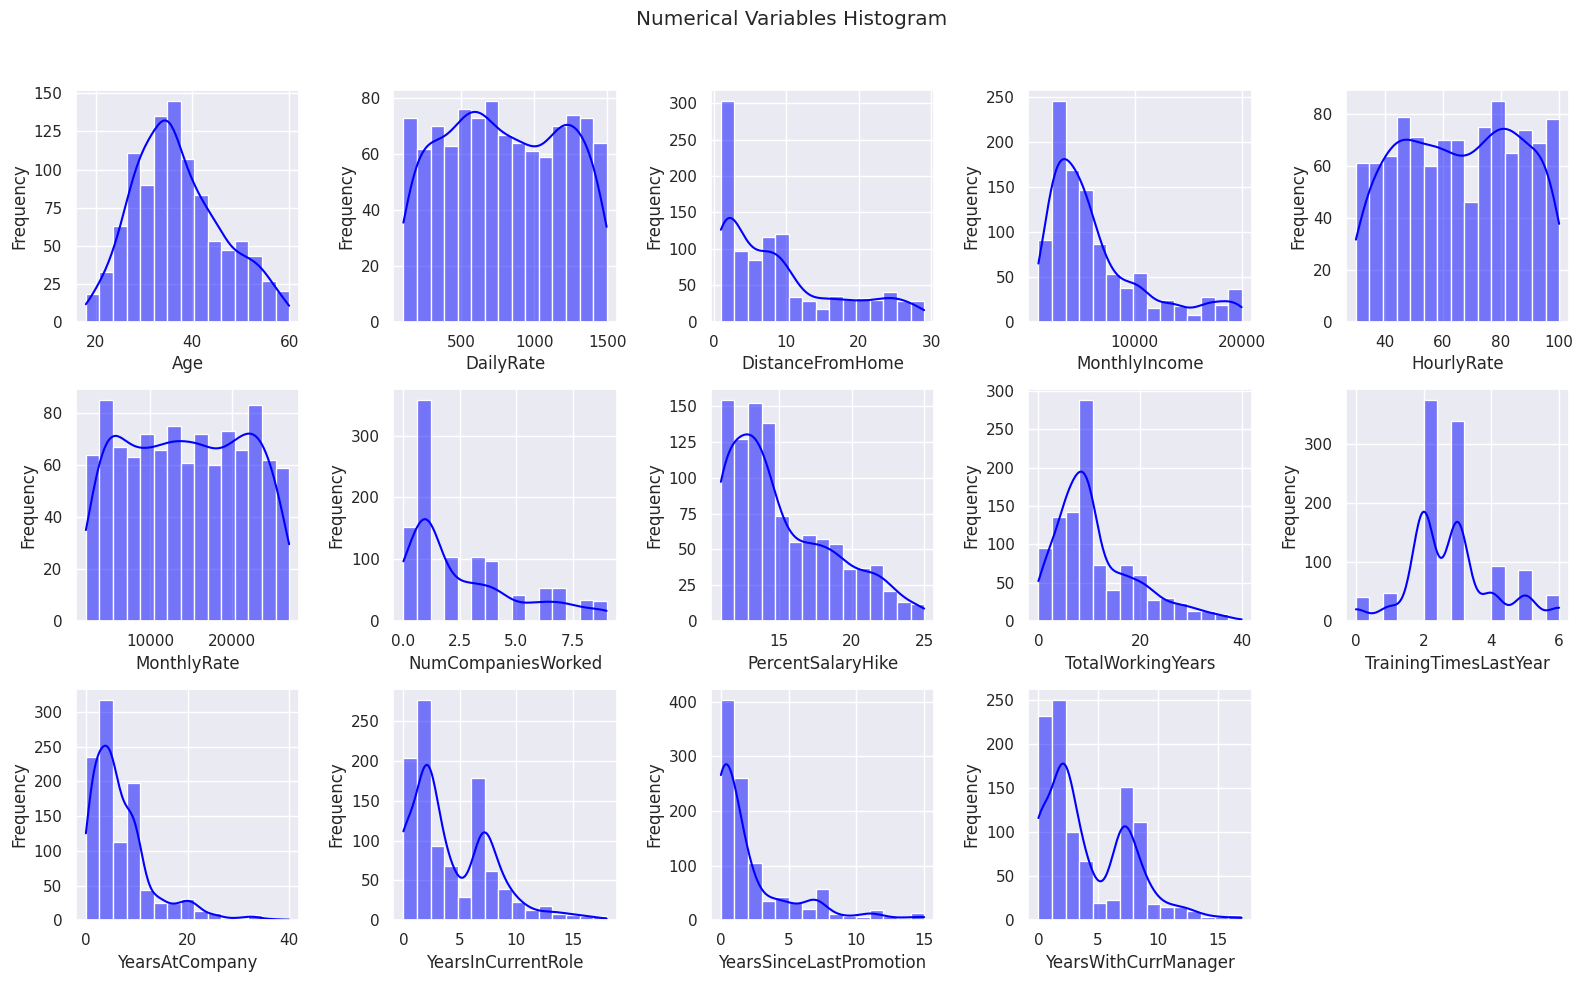

In [ ]:
numerical_variables_list = ["Age", "DailyRate", "DistanceFromHome", "MonthlyIncome",
                     "HourlyRate", "MonthlyRate", "NumCompaniesWorked",
                     "PercentSalaryHike",  "TotalWorkingYears",
                     "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole",
                     "YearsSinceLastPromotion", "YearsWithCurrManager"]

numerical_variables = Xtrain[numerical_variables_list]

sns.set(rc={'figure.figsize': (16,10)})

fig, axes = plt.subplots(3, 5)
for i in range(3):
  for j in range(5):
        if (i * 5 + j) == 14:
          fig.delaxes(axes[i, j])
          break
        else:
          num_of_bins = 15 #int(np.log2(len(numerical_variables.iloc[:,(i * 3 + j)])))+1 #Sturges rule
          sns.histplot(numerical_variables.iloc[:, (i * 5 + j)], bins=num_of_bins, kde=True, color="blue", ax=axes[i, j])
          axes[i, j].set_xlabel(numerical_variables.columns[i * 5 + j])
          axes[i, j].set_ylabel("Frequency")

plt.tight_layout()
fig.suptitle("Numerical Variables Histogram")
plt.subplots_adjust(top=0.9)
plt.show();


De acuerdo con la teoría las transformaciones se aplicarían de la siguiente manera:

Para variables continuas con sesgo a la derecha (positivo), se aplicaría **logaritmo**:


*   Age
*   DistanceFromHome
*   MonthlyIncome
*   PercentSalaryHike
*   TotalWorkingYears
*   YearsAtCompany
*   YearsInCurrentRole
*   YearsSinceLastPromotion
*   YearsWithCurrManager



Para variables discretas que se aproximan a una distribución de Poisson se aplicaría la **raíz cudadrada**, así mismo para las variables que no tienen una distribución muy sesgada:

*   TraningTimesLastYear
*   NumCompaniesWorked
*   DailyRate
*   HourlyRate
*   MonthlyRate



# **Ejercicio 9:**

#### **Se pueden analizar una buena cantidad de factores para buscar relaciones entre los factores y la variable de salida “Attrition”, la decisión de dejar un puesto. En particular, deberás ilustrar gráficamente la relación entre las siguientes variables, las cuales pueden aportar información al problema que estamos enfrentando de rotación de personal.**

a)	Las variables “Age” y “Attrition”.

b)	Las variables “Department” y “Attrition”.

c)	Las variables “Gender” y “Attrition”.

d)	Incluye alguna otra relación o relaciones que consideres relevantes.

e)	Con base a los gráficos obtenidos incluye tus conclusiones al respecto.


a)	Las variables “Age” y “Attrition”.

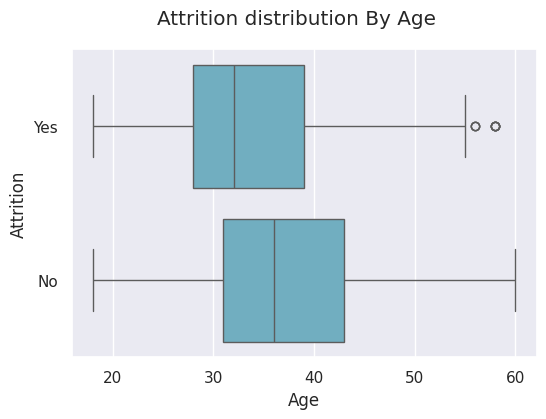

In [ ]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.
plt.figure(figsize=(6, 4))
sns.boxplot(x="Age", y="Attrition", data=df, color="c")
plt.suptitle("Attrition distribution By Age")
plt.subplots_adjust()
plt.show();

b)	Las variables “Department” y “Attrition”.

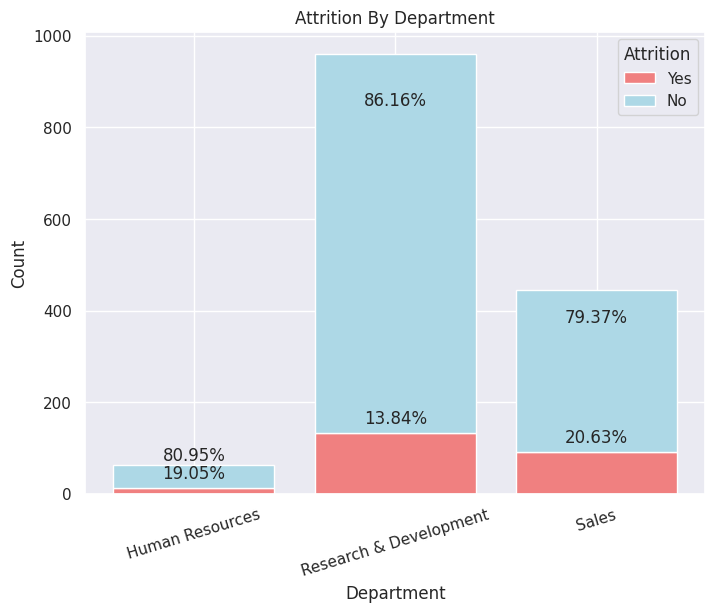

In [ ]:
grouped_df = df.groupby(['Department', 'Attrition']).size().unstack()
totals = grouped_df.sum(axis=1)
grouped_df['Yes_Percentage'] = (grouped_df['Yes'] / totals) * 100
grouped_df['No_Percentage'] = (grouped_df['No'] / totals) * 100

fig, ax = plt.subplots(figsize=(8, 6))

bars1 = ax.bar(grouped_df.index, grouped_df['Yes'], label='Yes', color='lightcoral')
bars2 = ax.bar(grouped_df.index, grouped_df['No'], bottom=grouped_df['Yes'], label='No', color='lightblue')

for bars, column in zip([bars1, bars2], ['Yes_Percentage', 'No_Percentage']):
    for bar, percentage in zip(bars, grouped_df[column]):
        height = bar.get_height()
        ax.annotate(f'{percentage:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 4),
                    textcoords='offset points', ha='center', va='bottom')

ax.set_xlabel('Department')
ax.set_ylabel('Count')
ax.set_title('Attrition By Department')
ax.legend(title='Attrition')
plt.xticks(rotation=17)
plt.show()

c)	Las variables “Gender” y “Attrition”.

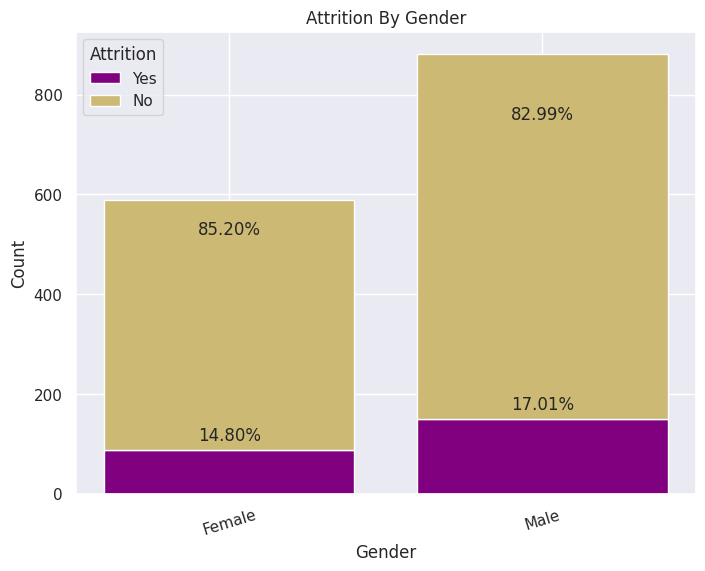

In [ ]:
grouped_df = df.groupby(['Gender', 'Attrition']).size().unstack()
totals = grouped_df.sum(axis=1)
grouped_df['Yes_Percentage'] = (grouped_df['Yes'] / totals) * 100
grouped_df['No_Percentage'] = (grouped_df['No'] / totals) * 100

fig, ax = plt.subplots(figsize=(8, 6))

bars1 = ax.bar(grouped_df.index, grouped_df['Yes'], label='Yes', color='purple')
bars2 = ax.bar(grouped_df.index, grouped_df['No'], bottom=grouped_df['Yes'], label='No', color='y')

for bars, column in zip([bars1, bars2], ['Yes_Percentage', 'No_Percentage']):
    for bar, percentage in zip(bars, grouped_df[column]):
        height = bar.get_height()
        ax.annotate(f'{percentage:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 4),
                    textcoords='offset points', ha='center', va='bottom')

ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Attrition By Gender')
ax.legend(title='Attrition')
plt.xticks(rotation=17)
plt.show()

d)	Incluye alguna otra relación o relaciones que consideres relevantes.

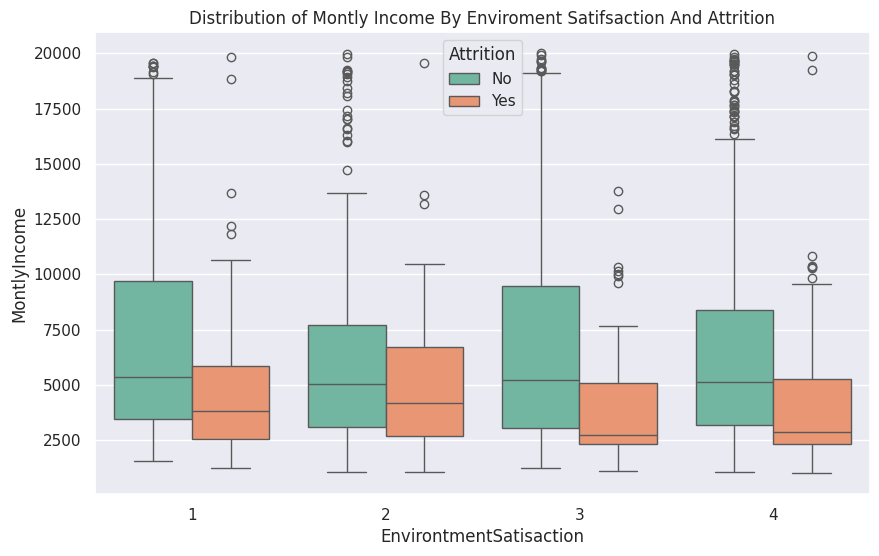

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='EnvironmentSatisfaction', y='MonthlyIncome', hue='Attrition', palette='Set2', data=df)
plt.title('Distribution of Montly Income By Enviroment Satifsaction And Attrition')
plt.xlabel('EnvirontmentSatisaction')
plt.ylabel('MontlyIncome')
plt.legend(title='Attrition')
plt.show()

e)	Con base a los gráficos obtenidos incluye tus conclusiones al respecto.


A continuaciónas las conclusiones respecto a cada gráfico:

*   **Attrition distribution By Age:** Podemos notar que el rango intercuartil de la distribución de quienes no han renunciado al trabajo esta desplazamos más hacia la derecha, lo que nos podría indicar que las personas con mayor edad tienden a renunciar menos o permanecer más en sus trabajo que las personas de menor edad.

*   **Attrition By Department:** Es notable que el departamento que tiene más abandono, en terminos relativos, a los puestos laborales es Sales, seguido por Human Resources y en tercer lugar Research & Development.


*   **Attrition By Gender:** El genero con más Attrition en terminos relativos es male con 17.01% mienstras que en female representa el 14.80%.


*   **Distribution of Montly Income By Enviroment Satifsaction And Attrition:** Se puede notar que en los niveles de satisfacción del ambiente laboral las distribuciones del ingreso no presentan un patrón definido, es decir, el ambiente laboral no tiene relación en particular con el ingreso mensual, con lo cual se podría decir que un amuento en el ingreso de los trabajadores no representa mejor ambiente laboral. Sin embargo, sí es notable que los rangos intercuartiles del ingreso de las personas que renunciaron al trabajo sí están desplazadas hacia abajo, es decir, entre menor ingreso mayor puede ser el attrition.

# **Ejercicio 10:**

#### **Encontrar la matriz de correlación de Pearson entre variables numéricas y a partir de dicha matriz encuentra aquellas correlaciones fuertes, positivas o negativas.**

**NOTA: Decimos que una correlación es fuerte cuando el valor absoluto es mayor a 0.7.**


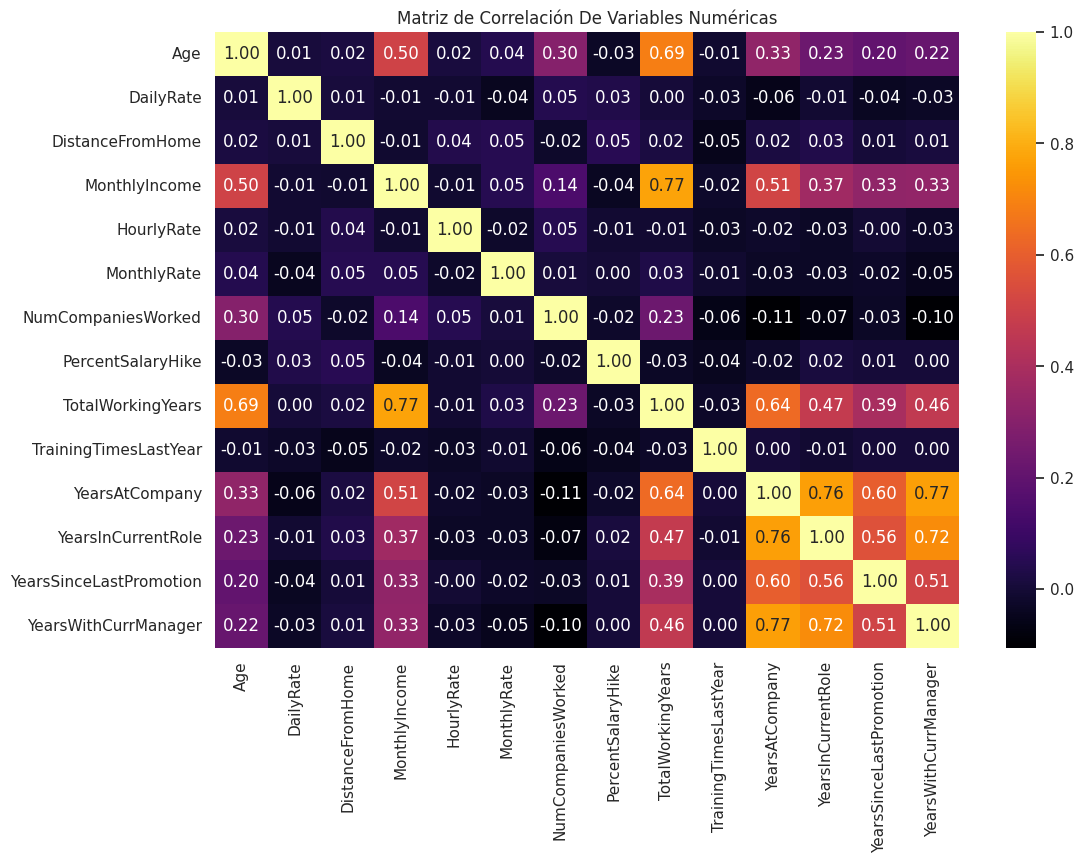

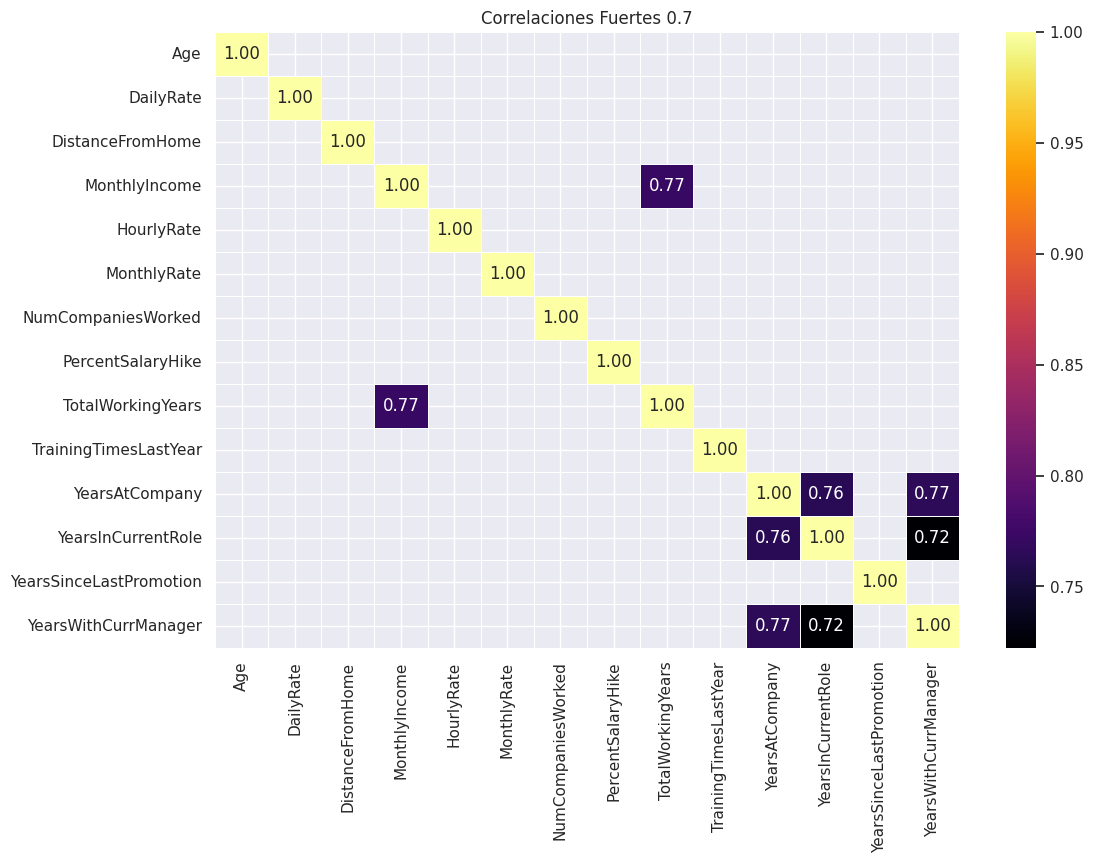

In [ ]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.

sns.set(rc={'figure.figsize':(12,8)})
corr = numerical_variables.corr() #Se agina la matriz de correlación a una variable
sns.heatmap(corr, annot=True, fmt=".2f", cmap="inferno") #Se crea el mapa de calor
plt.title("Matriz de Correlación De Variables Numéricas")#Titulo de gráfico
plt.show();

# Filtrar la matriz para encontrar correlaciones fuertes (abs > 0.7)
strong_correlations = corr[(corr > 0.7) | (corr < -0.7)]

#mapa de calor para visualizar las correlaciones fuertes
plt.figure(figsize=(12, 8))
sns.heatmap(strong_correlations, annot=True, cmap='inferno', fmt=".2f", linewidths=0.5)
plt.title('Correlaciones Fuertes 0.7')
plt.show()


Pares de variables con correlación fuerte:

*   MonthlyIncome - TotalWorkingYears
*   YearsWithCurrManager - YearsAtCompany
*   YearsWithCurrManager - YearsInCurrentRole
*   YearsInCurrentRole - YearsAtCompany





# **Ejercicio 11:**

#### **Utiliza las clases Pipeline y ColumnTransformer de Sklearn para definir las transformaciones que deberán aplicarse a cada variable de acuerdo a su tipo.**

**NOTA: A las variables numéricas aplica las transformaciones que hayas decidido en el Ejercicio 8; a las variables binarias y nominales puedes aplicarles las transformaciones One-Hot-Encoder; a las variables ordinales puedes aplicar la transformación OrdinalEncoder.**


In [ ]:
# NUMÉRICAS:
log_transform_cols = ['Age','DistanceFromHome', 'MonthlyIncome',
                      'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
                      'YearsInCurrentRole', 'YearsSinceLastPromotion',
                      'YearsWithCurrManager']

sqrt_transform_cols = ['TrainingTimesLastYear', 'NumCompaniesWorked', 'DailyRate',
                       'HourlyRate', 'MonthlyRate']


numericas_pipeline = Pipeline([
    ('log_transform', FunctionTransformer(lambda x: np.log(x+1))),
    ('sqrt', FunctionTransformer(lambda x: np.sqrt(x+1)))
])

numericas_pipeline_nombres = log_transform_cols + sqrt_transform_cols

# BINARIAS Y NOMINALES:
catOHE_pipeline = Pipeline([('catohe', OneHotEncoder())])
catOHE_pipeline_nombres = [
    'Gender',
    'OverTime',
    'PerformanceRating',
    'Department',  # 3 categorías
    'EducationField',  # 6 categorías
    'JobRole',  # 9 categorías
    'MaritalStatus'  # 3 categorías
]

# ORDINALES:
catOrd_pipeline = Pipeline([('catord', OrdinalEncoder())])
catOrd_pipeline_nombres = [
    'BusinessTravel',  # 3 Niveles
    'Education',  # 5 Niveles
    'EnvironmentSatisfaction',  # 4 Niveles
    'JobInvolvement',  # 4 Niveles
    'JobLevel',  # 5 Niveles
    'JobSatisfaction',  # 4 Niveles
    'RelationshipSatisfaction',  # 4 Niveles
    'StockOptionLevel',  # 4 Niveles
    'WorkLifeBalance'  # 4 Niveles
]

columnasTransformer = ColumnTransformer([
    ("num_cols_transform", numericas_pipeline, numericas_pipeline_nombres),
    ("catohe_cols_transform", catOHE_pipeline, catOHE_pipeline_nombres),
    ("catord_cols_transform", catOrd_pipeline, catOrd_pipeline_nombres),
], remainder='passthrough')

# **Ejercicio 12:**

#### **12)	Utilizando los conjuntos de entrenamiento y validación, encuentra los mejores hiperparámetros del modelo LogisticRegresion de Sklearn para obtener un modelo no sobre entrenado.**

**NOTA: Por el momento diremos que un modelo de clasificación no está sobreentrenado, si la diferencia de la exactitud (Accuracy) entre el conjunto de entrenamiento y el de validación es menor al 3%.**


In [ ]:
LGR = LogisticRegression()

pipeline_lgr = Pipeline(steps=[
    ('ct', columnasTransformer)
])

Xtrain_lgr = pipeline_lgr.fit_transform(Xtrain)
Xval_lgr = pipeline_lgr.fit_transform(Xval)

dicc_grid = {'C': list(range(1, 4)),
             'max_iter': [100, 1000, 2000],
             'solver': ['lbfgs', 'liblinear', 'newton-cg',
                        'newton-cholesky', 'sag', 'saga']}

modelo_LGRGS = GridSearchCV(LGR, param_grid=dicc_grid)

modelo_LGRGS.fit(Xtrain_lgr, ytrain)

print("Los mejores para hiperparametros son %s con un score de %0.4f" % (modelo_LGRGS.best_params_, modelo_LGRGS.best_score_))
print("------------------------------------------")
print("Se procede a aplicar dichos parametros al modelo e imprimir metricas")
modelo_LGR = LogisticRegression(C=modelo_LGRGS.best_params_['C'],
                                max_iter=modelo_LGRGS.best_params_['max_iter'],
                                solver=modelo_LGRGS.best_params_['solver'])
modelo_LGR.fit(Xtrain_lgr, np.ravel(ytrain))

print(">>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación:")
y_pred_trainRL = modelo_LGR.predict(Xtrain_lgr)
y_pred_valRL = modelo_LGR.predict(Xval_lgr)
print('accuracy-train', metrics.accuracy_score(ytrain, y_pred_trainRL))
print('accuracy-val', metrics.accuracy_score(yval, y_pred_valRL))

print("\n>>Matriz de Confusión:")
print(metrics.confusion_matrix(yval, y_pred_valRL))

print("\n>>Reporte varias métricas:")
print(metrics.classification_report(yval, y_pred_valRL))

Los mejores para hiperparametros son {'C': 2, 'max_iter': 100, 'solver': 'newton-cg'} con un score de 0.8774
------------------------------------------
Se procede a aplicar dichos parametros al modelo e imprimir metricas
>>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación:
accuracy-train 0.8959143968871596
accuracy-val 0.8868778280542986

>>Matriz de Confusión:
[[181   4]
 [ 21  15]]

>>Reporte varias métricas:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       185
           1       0.79      0.42      0.55        36

    accuracy                           0.89       221
   macro avg       0.84      0.70      0.74       221
weighted avg       0.88      0.89      0.87       221



# **Ejercicio 13:**

#### **Con base a la información del desempeño obtenido en el ejercicio anterior para los conjuntos de entrenamiento y validación, contesta los siguientes incisos:**

a)	¿Podemos decir que el modelo está subentrenado (underfitting) o sobreentrenado (overfitting)?
<br/>
<br/>

Con base a las metricas podemos decir que el modelo no esta sobre-entreando ya que de la diferencia entre el accuracy del conjunto entrenamiento y del conjunto de validación es menor al 3%, sin embargo, las metricas de precision y recall para la clase 1 son muy bajas, esto indica que el modelo aun no esta generalizando de la mejor manera el problema y por lo mismo no es capaz de identificar de mejor manera los nuevos datos pertencen a la clase 1.
<br/>
<br/>
b)	Interpreta el valor numérico obtenido para la “precision” de la clase positiva.
<br/>
<br/>

El modelo clasificó correctamente el 71% (verdaderos positivos) del total de **predicciones** positivas, es decir, del total de la suma de verdaderos positivos más falsos positivos.
<br/>
<br/>
c)	Interpreta el valor numérico obtenido para el “recall” de la clase positiva.
<br/>
<br/>
En este caso el modelo solo clasificó correctamente el 42% de todas las instancias que son **realmente** positivas (verdaderos positivos más falsos negativos), lo que nos habla de una capacidad limitada del modelo de identificar las intancias realmente positivas.
<br/>
<br/>
d)	Con base al contexto de este problema, de rotación de personal, ¿cuál de las métricas, “precision” o “recall” consideras que es más importante disminuir su valor. Es decir, si no se puede disminuir el valor de ambos al mismo tiempo y debieras sacrificar uno de ellos, ¿cuál sería el que buscarías que fuera más cercano a cero? Justifica tu respuesta con base al contexto del problema.
<br/>
<br/>
En este caso se buscaría disminuir al maximo la precisión para aumentar el recall, ya que en este caso si diminuyo la precisión significa que se estan aumentando los falsos positivos lo cual no tiene implicaciones graves en las empresas al sobreestimar el numero de empleados que se van, sin embargo, al disminuir el recall significa estar aumentando los falsos negativos, esto implica que haya gastos de reemplazo no presupuestados o aumenta el riesgo operacional al no preever el numero de personas que se van.

# **Ejercicio 14:**

#### **Utiliza los conjuntos de entrenamiento y validación para generar el mejor modelo no sobreentrenado de los k Vecinos más Cercanos, kNN, usando la función KNeighborsClassifier() de Sklearn. Compara los resultados con el modelo de regresión logística e incluye tus conclusiones.**

In [ ]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.

for k in range(1,21):
    modeloKNN = KNeighborsRegressor(n_neighbors=k)

    pipelineKNN = Pipeline(steps=[
        ('ct', columnasTransformer),
        ('modeloKNN', modeloKNN)
    ])

    pipelineKNN.fit(Xtrain, ytrain)


    train_score = pipelineKNN.score(Xtrain, ytrain)
    val_score = pipelineKNN.score(Xval, yval)
    print('k=%d\tTrain: %.4f\tValidation: %.4f' % (k, train_score, val_score))


k=1	Train: 1.0000	Validation: -0.2610
k=2	Train: 0.6228	Validation: 0.1123
k=3	Train: 0.4890	Validation: 0.2331
k=4	Train: 0.4292	Validation: 0.1683
k=5	Train: 0.3800	Validation: 0.1532
k=6	Train: 0.3555	Validation: 0.1677
k=7	Train: 0.3265	Validation: 0.1359
k=8	Train: 0.3054	Validation: 0.1632
k=9	Train: 0.2888	Validation: 0.1491
k=10	Train: 0.2815	Validation: 0.1402
k=11	Train: 0.2720	Validation: 0.1230
k=12	Train: 0.2642	Validation: 0.1391
k=13	Train: 0.2495	Validation: 0.1408
k=14	Train: 0.2391	Validation: 0.1405
k=15	Train: 0.2343	Validation: 0.1532
k=16	Train: 0.2264	Validation: 0.1553
k=17	Train: 0.2223	Validation: 0.1593
k=18	Train: 0.2173	Validation: 0.1731
k=19	Train: 0.2110	Validation: 0.1668
k=20	Train: 0.2056	Validation: 0.1634


Metódo GridSearch para buscar el mejor modelo

In [ ]:
kNN = KNeighborsRegressor()

pipeline_tknn = Pipeline(steps=[
    ('ct', columnasTransformer)
])

Xtrain_kNN = pipeline_tknn.fit_transform(Xtrain)

dicc_grid = {'n_neighbors': list(range(1, 21)),
             'weights': ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev']}

modelo_kNN = GridSearchCV(kNN, param_grid=dicc_grid, cv=3)

modelo_kNN.fit(Xtrain_kNN, ytrain)

print("Los mejores para hiperparametros son %s con un score de %0.2f" % (modelo_kNN.best_params_, modelo_kNN.best_score_))

Los mejores para hiperparametros son {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'} con un score de 0.15


Como se puede observar el modelo de regresión logística tiene un mejor performance que el modelo de vecinos más cercanos KNN, ya que después de variar hiperparametro `k`, podemos observar que no hay un `k` que nos brinde un performance R^2 que se pueda considerar competitivo, tanto en entrenamiento como validación, al accurary obtenido con el modelo de regresión logística. De hecho, el score de validación en ningun caso supera el 0.1 y el mejor modelo usando GridSearchCV con datos de entrenamiento presenta un score muy bajo.
<br/>
Sin embargo, es preciso mencionar que aun se deben hacer ajustes al modelo de regresión logística para obtener mejores metricas.

# **Ejercicio 15:**

#### **Utilizando el mejor modelo obtenido previamente (regresión logística o kNN), utiliza algún método de submuestreo (undersampling) o sobremuestreo (oversampling) que consideres adecuado de la librería “Imbalanced-learn” y los valores de los hiperparámetros que consideres más adecuados, para obtener el mejor modelo posible.**

**NOTA: Ver la documentación correspondiente:** https://imbalanced-learn.org/stable/references/


In [ ]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.
msmote = SMOTE(sampling_strategy=1.0, random_state=23)

modeloRL = LogisticRegression(solver='newton-cholesky', max_iter=1000)

pipelineRL = imb_pipeline.Pipeline(steps=[('ct',columnasTransformer),
                                  ('oversampling', msmote),
                                  ('modeloRL',modeloRL)])

pipelineRL.fit(Xtrain, np.ravel(ytrain))

print('accuracy-train-balanced', pipelineRL.score(Xtrain, ytrain))
print('accuracy-val-balanced', pipelineRL.score(Xval, yval))

y_pred_train = pipelineRL.predict(Xtrain)

y_pred_val = pipelineRL.predict(Xval)

print(metrics.confusion_matrix(yval, y_pred_val))
print(metrics.classification_report(yval, y_pred_val))

accuracy-train-balanced 0.7889105058365758
accuracy-val-balanced 0.8054298642533937
[[149  36]
 [  7  29]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.87       185
           1       0.45      0.81      0.57        36

    accuracy                           0.81       221
   macro avg       0.70      0.81      0.72       221
weighted avg       0.87      0.81      0.83       221



In [ ]:
LGR = LogisticRegression()
msmote = SMOTE(sampling_strategy=1.0, random_state=23)
pipeline_lgr = imb_pipeline.Pipeline(steps=[
    ('ct', columnasTransformer), ('oversampling', msmote)
])

Xtrain_lgr,ytrain_lgr = pipeline_lgr.fit_resample(Xtrain, np.ravel(ytrain))

dicc_grid = {'C': list(range(1, 4)),
             'max_iter': [100, 1000, 2000],
             'solver': ['lbfgs', 'liblinear', 'newton-cg',
                        'newton-cholesky', 'sag', 'saga']}

modelo_LGR = GridSearchCV(LGR, param_grid=dicc_grid)

modelo_LGR.fit(Xtrain_lgr, ytrain_lgr)

print("Los mejores para hiperparametros son %s con un score de %0.4f" % (modelo_LGR.best_params_, modelo_LGR.best_score_))

Los mejores para hiperparametros son {'C': 3, 'max_iter': 2000, 'solver': 'sag'} con un score de 0.8059


Finalmente calculamos las metricas con los mejores parametros para responder a los incisos...

accuracy-train-balanced 0.7869649805447471
accuracy-val-balanced 0.7918552036199095


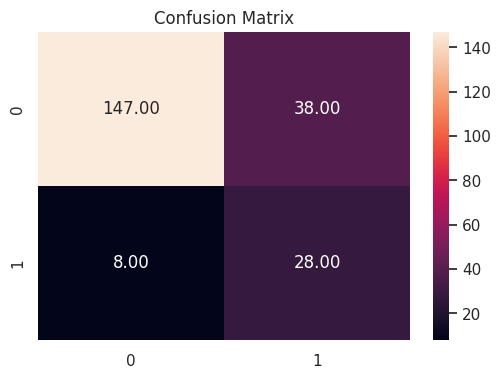

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       185
           1       0.42      0.78      0.55        36

    accuracy                           0.79       221
   macro avg       0.69      0.79      0.71       221
weighted avg       0.86      0.79      0.81       221



In [ ]:
msmote = SMOTE(sampling_strategy=1.0, random_state=23)

modeloRL = LogisticRegression(solver=modelo_LGR.best_params_['solver'],
                              C=modelo_LGR.best_params_['C'],
                              max_iter=modelo_LGR.best_params_['max_iter'])

pipelineRL = imb_pipeline.Pipeline(steps=[('ct',columnasTransformer),
                                  ('oversampling', msmote),
                                  ('modeloRL',modeloRL)])

pipelineRL.fit(Xtrain, np.ravel(ytrain))

print('accuracy-train-balanced', pipelineRL.score(Xtrain, ytrain))
print('accuracy-val-balanced', pipelineRL.score(Xval, yval))

y_pred_train = pipelineRL.predict(Xtrain)

y_pred_val = pipelineRL.predict(Xval)


plt.figure(figsize=(6,4))
cm = metrics.confusion_matrix(yval, y_pred_val)
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt= ".2f", xticklabels=[0, 1], yticklabels=[0, 1])
plt.show()
print(metrics.classification_report(yval, y_pred_val))

#### **Con dicho modelo:**

**a)	Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.**


*   **Exactitud entrenamiento:** 0.81
*   **Exactitud validación:** 0.76



**b)	Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.**

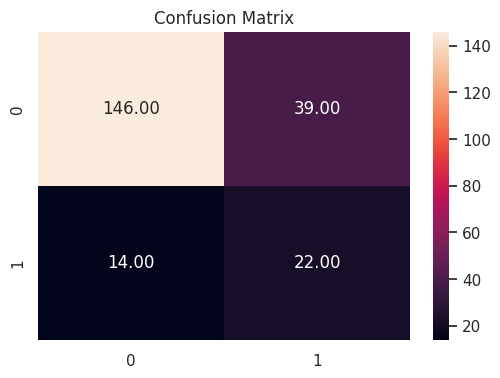

**c)	¿Qué métrica es la que consideras que explica mejor el buen desempeño de nuestro modelo?**

En este caso la metrica que debería de ponderar más es recall (sensibilidad), debido a que entre más se aproxime dicha metrica a 1 significa que los falsos negativos se van reduciendo y son los que nos interesan reducir, pues si hay muchos casos de este tipo: personas que sí renuncian y que el modelo predice como que no lo hacen, entonces puede haber un impacto economico y operacional a la empresa que no se tenía previsto.

**d)	Compara los resultados con los modelos anteriores y escribe tus conclusiones.**

Podemos observar que en comparación con el modelo de regresión lineal sin balanceo de clases e hiperparamentros por default, hubo una disminución en la exactitud (accuracy), sin embargo, hubo un aumento considerable de la sensibilidad (recall), esto nos pude hablar de que modelo redujó el sobre-entrenamiento y además amuentó la metrica que es de nuestro interés tratar, la sensibilidad.

# **Ejercicio 16:**

#### **Con base al mejor modelo que hayas obtenido hasta ahora, aplica la técnica de permutación de los factores con el método “permutation_importance()” de Sklearn, para identificar aquellos factores que se consideran los más importantes al problema de rotación de personal.**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)	Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor asociado a cada barra (bin). Utiliza el conjunto de validación.**



**b)	¿Cuáles factores consideras que son los que influyen mayormente a que un empleado abandone su trabajo?**



++++++++ Termina la sección de agregar texto: ++++++++++++



**a)	Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor asociado a cada barra (bin). Utiliza el conjunto de validación.**

Feature: 0, Score: 0.05000
Feature: 1, Score: 0.01111
Feature: 2, Score: 0.02222
Feature: 3, Score: 0.04444
Feature: 4, Score: 0.00556
Feature: 5, Score: -0.00556
Feature: 6, Score: 0.03889
Feature: 7, Score: -0.01111
Feature: 8, Score: 0.02778
Feature: 9, Score: 0.01667
Feature: 10, Score: 0.03889
Feature: 11, Score: -0.00556
Feature: 12, Score: 0.10556
Feature: 13, Score: 0.04444
Feature: 14, Score: 0.05556
Feature: 15, Score: 0.04444
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.05556
Feature: 18, Score: 0.14444
Feature: 19, Score: 0.02778
Feature: 20, Score: 0.00556
Feature: 21, Score: 0.02778
Feature: 22, Score: 0.01111
Feature: 23, Score: 0.05000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.01667
Feature: 26, Score: 0.02222
Feature: 27, Score: 0.03333
Feature: 28, Score: 0.00556
Feature: 29, Score: 0.02222


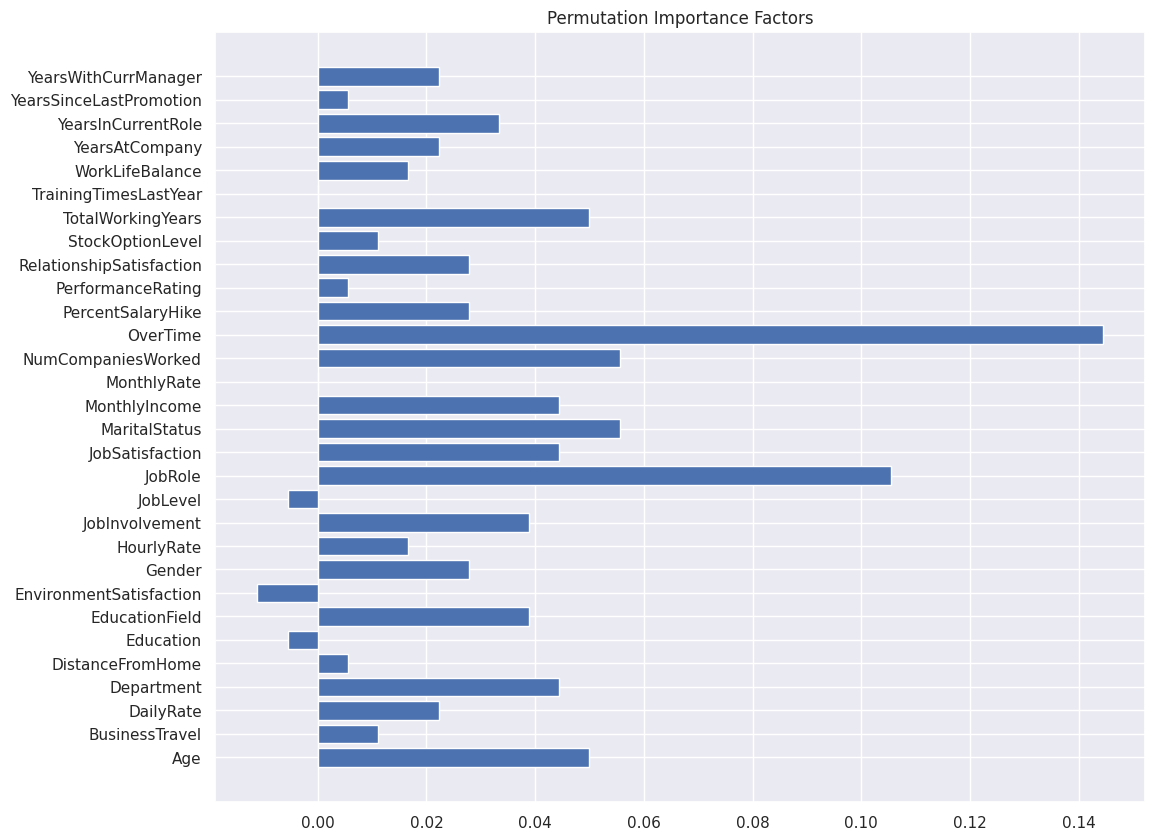

In [ ]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.
results = permutation_importance(pipelineRL, Xval, yval, scoring='recall')
importance = results.importances_mean

for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
plt.figure(figsize=(12,10))
plt.title("Permutation Importance Factors")
plt.barh([pd.DataFrame(Xval).columns[x] for x in range(len(importance))], importance)
plt.show()


**b)	¿Cuáles factores consideras que son los que influyen mayormente a que un empleado abandone su trabajo?**

Los factores que resultan más importantes (en este caso se consideran 3 por mencionar algunos) para que el empleado abandoné su trabajó, ordenados por magnitud, son:

1.   Rol de trabajo (JobRole)
2.   Satisfacción de ambiente laboral (EnvirontmentSatisfaction)
3.   Satisfacción con el trabajo (JobSatisfaction)



En este caso son las magnitudes y significado de las variables que más destacan. Todas pueden tener una relación con la deserción tomando en cuenta que todos son factores determinantes para que una persona se sienta moralmente motivada con el trabajo.

# **Ejercicio 17:**

#### **Finalmente, con base a todos los resultados obtenidos hasta ahora, responde a los siguientes incisos para obtener el que consideres el mejor modelo para enfrentar el problema de rotación de personal. Forma un nuevo conjunto de Entrenamiento con los conjuntos de entrenamiento y validación y utiliza el conjunto de Prueba (Test) para obtener el desempeño final de tu mejor modelo, desplegando la siguiente información:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)	Despliega la matriz de confusión y el reporte dado por la función classification_report() del conjunto de Prueba.**


**b)	Incluye las conclusiones finales de la actividad. En particular interpreta y explica con base al problema de rotación de personal, los resultados obtenidos para las métricas “precision”, “recall” y “f1-score”.**


++++++++ Termina la sección de agregar texto: ++++++++++++

Nuevo conjunto de entrenamiento:

In [ ]:
Xtrain_final = pd.concat([Xtrain, Xval], axis=0)
ytrain_final = np.concatenate([ytrain, yval], axis=0)

Final Model:

In [ ]:
msmote = SMOTE(sampling_strategy=1.0, random_state=23)

modeloR_final = LogisticRegression(solver=modelo_LGR.best_params_['solver'],
                                   C=modelo_LGR.best_params_['C'],
                                   max_iter=modelo_LGR.best_params_['max_iter'])

pipelineRL_final = imb_pipeline.Pipeline(steps=[('ct',columnasTransformer),
                                  ('oversampling', msmote),
                                  ('modeloRL',modeloRL)])

pipelineRL_final.fit(Xtrain_final, np.ravel(ytrain_final))

print('accuracy-train-balanced', pipelineRL_final.score(Xtrain_final, ytrain_final))
print('accuracy-test-balanced', pipelineRL_final.score(Xtest, ytest))

y_pred_train = pipelineRL_final.predict(Xtrain_final)

y_pred_test = pipelineRL_final.predict(Xtest)

accuracy-train-balanced 0.7982385908726981
accuracy-test-balanced 0.7601809954751131


**a)	Despliega la matriz de confusión y el reporte dado por la función classification_report() del conjunto de Prueba.**

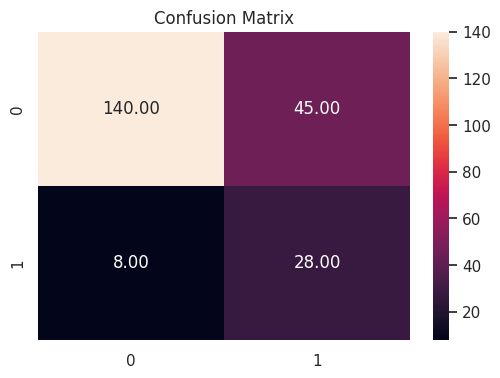

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       185
           1       0.38      0.78      0.51        36

    accuracy                           0.76       221
   macro avg       0.66      0.77      0.68       221
weighted avg       0.85      0.76      0.79       221



In [ ]:
plt.figure(figsize=(6,4))
cm = metrics.confusion_matrix(ytest, y_pred_test)
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt= ".2f", xticklabels=[0, 1], yticklabels=[0, 1])
plt.show()
print(metrics.classification_report(ytest, y_pred_test))

**b)	Incluye las conclusiones finales de la actividad. En particular interpreta y explica con base al problema de rotación de personal, los resultados obtenidos para las métricas “precision”, “recall” y “f1-score”.**

Se pudo obtener un modelo con una exactitud del 80% para datos de entrenamiento (training) y 78% para datos de prueba (test), así mismo se obtuvo una precisión del 94% para la clase negativa (mayoritaria) y 40% para la clase positiva (minoritaria). Por su parte, la clase negativa presentó una sensibilidad del 79%  contra 72% de la clase positiva. Y la metrica f1-score fue del 86% para la clase negativa contra el 51% de la clase positiva.

De los resultados obtenidos, podemos observar la metrica recall se incrementó de manera considerable para la clase positiva la cuál durante la actividad se estableció como objetivo pues, como se explicó, un recall cercano a 1 para la clase positiva significa una diminución de los casos falsos negativos los cuales tienen el mayor impacto en terminos económicos y operativos para una empresa. También se observó una diminución ligera en la exactitud respecto al primer modelo obtenido, sin embargo, esto se debió que la metrica del primer modelo indicaba sobre-entrenamiento (overfitting) puesta en perspectiva con las demás metricas (precision, recall, f1-score), por lo que en el modelo final sugiere que se llego a una mejor generalización del problema en cuanto al aprendizaje del modelo.

Por su parte, la precision para la clase positiva se vio afectada por el aumento del recall, sin embargo, es más conveniente tener falsos positivos que falsos negativos como ya se explicó anteriomente. En relación con lo anterior la metrica f1-score sugiere que hay un margen de mejora para la reducción en este caso de los falsos positivos, pues se estan generando una cantidad considerable, pero el argumento es el mismo, se prefieren mas casos falsos positivos que falsos negativos.

Finalmente, es posible decir que el modelo es aceptable aunque es importante señalar que aun se pueden tomar acciones para obtener mejores metricas, pues falta explorar distintas transformaciones, variar más hiperparámetros e incluso aplicar técnicas de reducción de variables u otros modelos de clasificación para ver si se pueden obtener mejores resultados en las metricas.